## 潜在変数モデル
ラベルスイッチの起き方の説明用サンプル

<a href="https://colab.research.google.com/github/makaishi2/python_bayes_intro/blob/main/sample-notebooks/FAQ_%E6%BD%9C%E5%9C%A8%E5%A4%89%E6%95%B0%E3%83%A2%E3%83%87%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 共通処理

In [1]:
%matplotlib inline
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

In [2]:
# ライブラリのimport

# NumPy用ライブラリ
import numpy as np
# Matplotlib中のpyplotライブラリのインポート
import matplotlib.pyplot as plt
# matplotlib日本語化対応ライブラリのインポート
import japanize_matplotlib
# pandas用ライブラリ
import pandas as pd
# データフレーム表示用関数
from IPython.display import display
# seaborn
import seaborn as sns
# 表示オプション調整
# NumPy表示形式の設定
np.set_printoptions(precision=3, floatmode='fixed')
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)
# 方眼表示ON
plt.rcParams['axes.grid'] = True
# データフレームでの表示精度
pd.options.display.float_format = '{:.3f}'.format
# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

### 5.4.1 問題設定
アイリスデータセットで特定項目の値のみを利用する。  
花の種別の情報をなしで、2種類の花の統計的特徴を推論する。


### 5.4.2 データ準備

#### データ読み込みと確認

In [26]:
# アイリスデータセットの読み込み
df = sns.load_dataset('iris')

#### 分析対象データの絞り込み


In [5]:
# 花の種類をsetosa以外の２種類に絞り込む
df2 = df.query('species != "setosa"')

# インデックスを0から振り直す
df2 = df2.reset_index(drop=True)

# petal_widthの項目値をx_dataにセット
X = df2['petal_width'].values

### 5.4.3 確率モデル定義

#### 潜在変数モデルの確率モデル定義

In [8]:
# 変数の初期設定

# 何種類の正規分布モデルがあるか
n_components = 2

# 観測データ件数
N = X.shape

model1 = pm.Model()

with model1:
    # Xの観測値をConstantDataとして定義
    X_data = pm.ConstantData('X_data', X)

    # p: 潜在変数が1の値をとる確率
    p = pm.Uniform('p', lower=0.0, upper=1.0)

    # s: 潜在変数pの確率値をもとに0, 1のいずれかの値を返す
    s = pm.Bernoulli('s', p=p, shape=N)

    # mus: ２つの花の種類毎の平均値
    mus = pm.Normal('mus', mu=0.0, sigma=10.0, shape=n_components)

    # taus: 2つの花の種類毎のバラツキ
    # 標準偏差sigmasとの間にはtaus = 1/(sigmas*sigmas)の関係がある
    taus = pm.HalfNormal('taus', sigma=10.0, shape=n_components)

    # グラフ描画など分析でsigmasが必要なため、tausからsigmasを求めておく
    sigmas = pm.Deterministic('sigmas', 1/pm.math.sqrt(taus))

    # 各観測値ごとに潜在変数からmuとtauを求める
    mu = pm.Deterministic('mu', mus[s])
    tau = pm.Deterministic('tau', taus[s])

    # 正規分布に従う確率変数X_obsの定義
    X_obs = pm.Normal('X_obs', mu=mu, tau=tau, observed=X_data)

### 5.4.4 サンプリングと結果分析

#### サンプリング

In [15]:
with model1:
    idata1_2 = pm.sample(target_accept=0.99, chains=5,
      random_seed=42)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


#### plot_trace関数で推論結果の確認

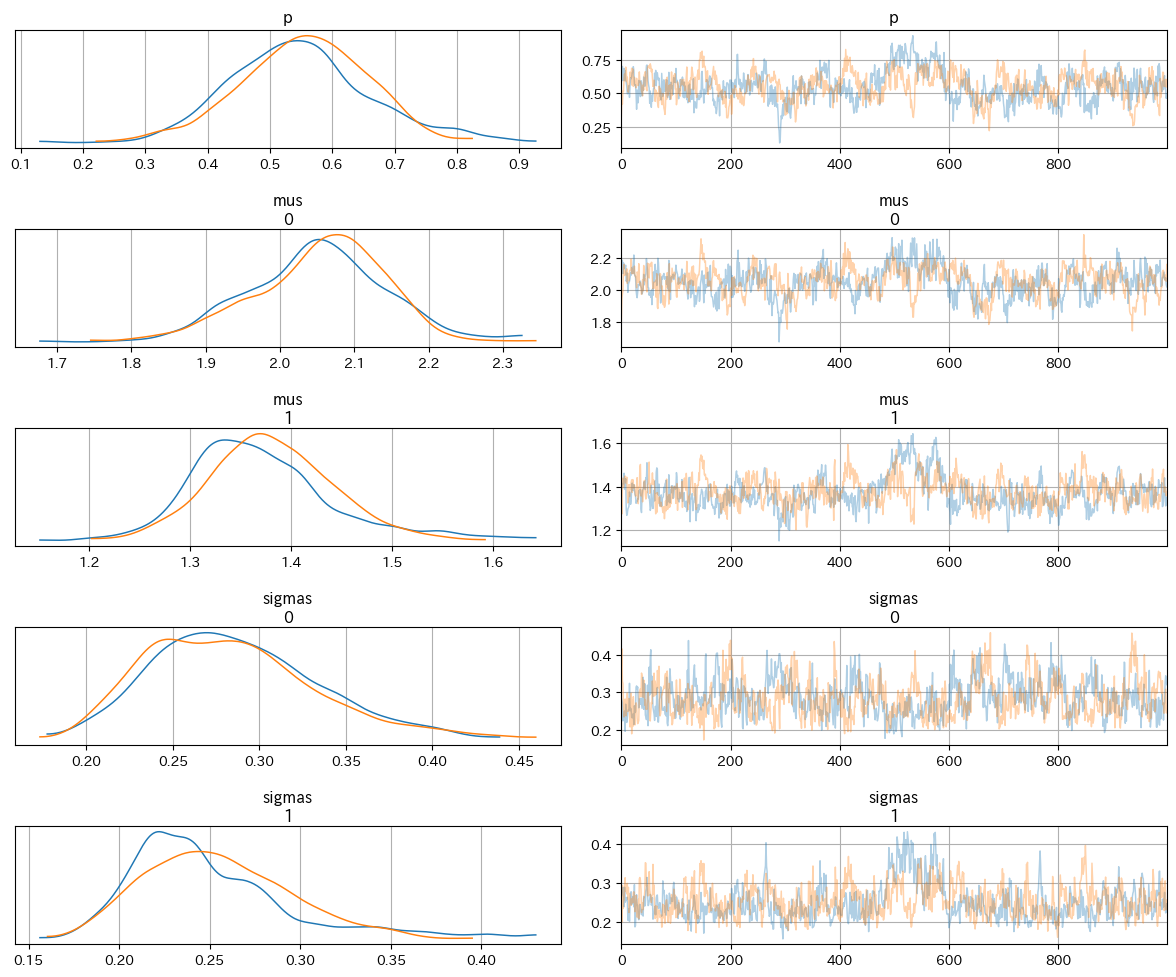

In [25]:
# 最初の２つのchainのみ抽出
az.plot_trace(idata1_2, var_names=['p', 'mus', 'sigmas'], coords={"chain": [0, 1]}, compact=False)
plt.tight_layout();

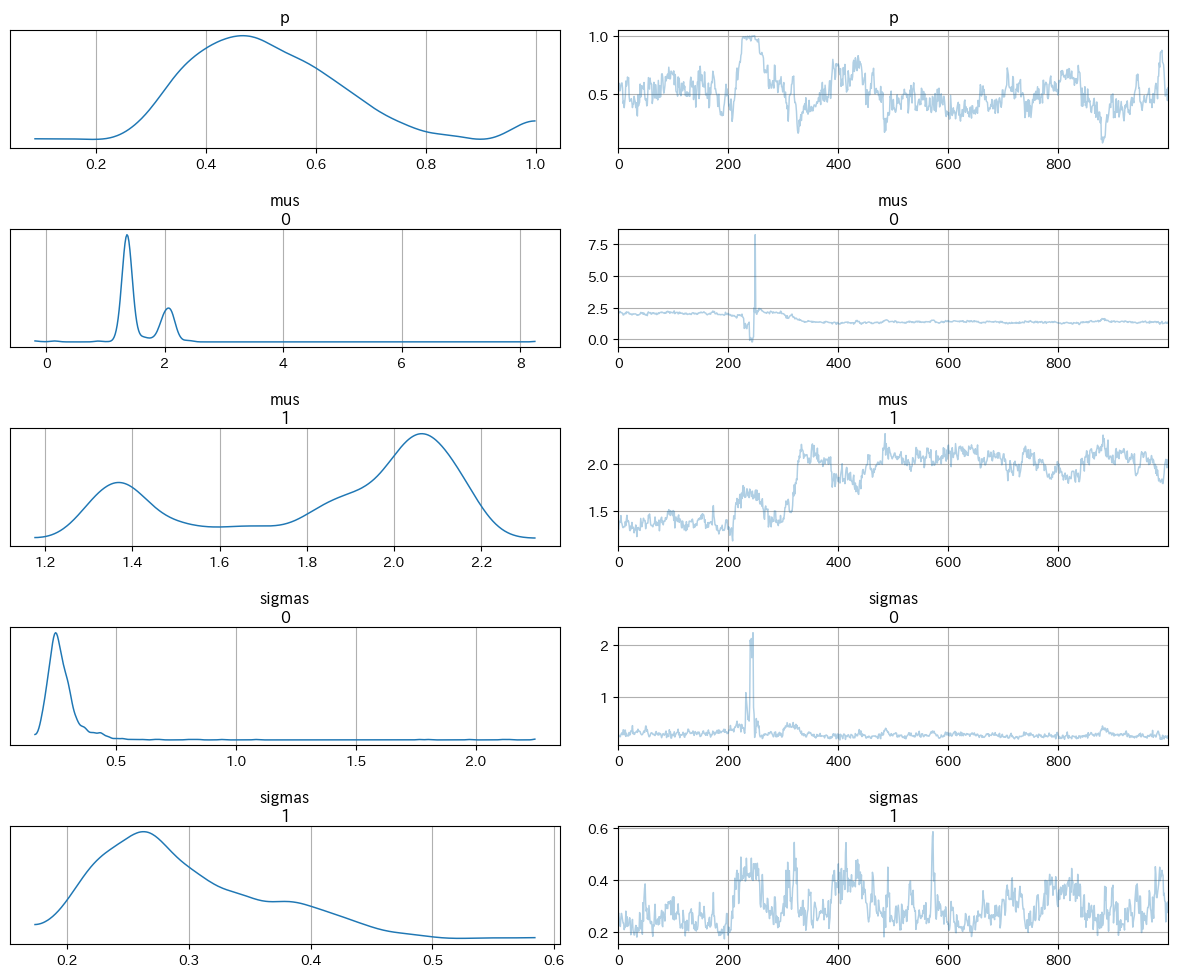

In [23]:
# 3番目のchainのみ抽出
az.plot_trace(idata1_2, var_names=['p', 'mus', 'sigmas'], coords={"chain": [2]}, compact=False)
plt.tight_layout();

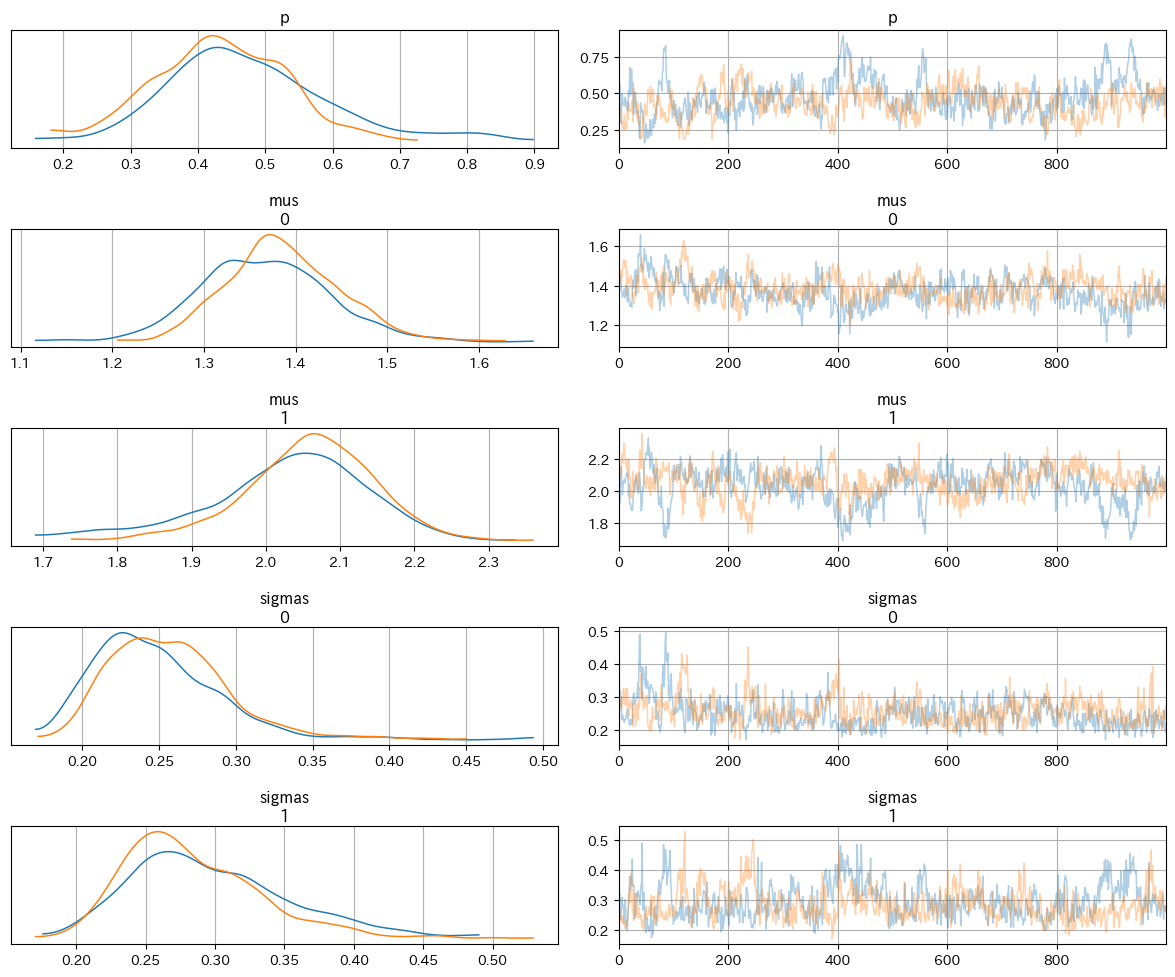

In [24]:
# 最後の２つのchainのみ抽出
az.plot_trace(idata1_2, var_names=['p', 'mus', 'sigmas'], coords={"chain": [3, 4]}, compact=False)
plt.tight_layout();

In [ ]:
!pip install watermark | tail -n 1
%load_ext watermark
%watermark --iversions